In [12]:
#Import libraries
import yfinance as yf
import pandas as pd
import numpy as np
from datetime import timedelta
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [31]:
#Load last 90 days of BTC data
btc_data = yf.download("BTC-USD", period="90d", auto_adjust=False)
btc_data = btc_data[["Open", "High", "Low", "Volume", "Close"]].dropna()

#Create target column (next day close)
btc_data["Next_Close"] = btc_data["Close"].shift(-1)
btc_data.dropna(inplace=True)

[*********************100%***********************]  1 of 1 completed


In [32]:
#Features and target
X = btc_data[["Open", "High", "Low", "Volume"]]
y = btc_data["Next_Close"]

#Train Linear Regression model
model = LinearRegression()
model.fit(X, y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [33]:
#Prepare for prediction
recent = X.iloc[-1].values.reshape(1, -1)
predicted = []
dates = []
last_date = btc_data.index[-1]

#Predict next 3 days
for i in range(1, 4):
    pred_close = model.predict(recent)[0]
    predicted.append(pred_close)
    dates.append(last_date + timedelta(days=i))

    #Simulate next day inputs
    next_open = pred_close
    next_high = pred_close * 1.01
    next_low = pred_close * 0.99
    next_volume = recent[0][3]

    recent = np.array([[next_open, next_high, next_low, next_volume]])

In [24]:
#Build forecast DataFrame
forecast = pd.DataFrame({
    "Date": dates,
    "Predicted_Close": predicted
}).set_index("Date")

forecast

,Predicted_Close
Date,
2025-06-28,107415.711386
2025-06-29,107583.508315
2025-06-30,107744.034456


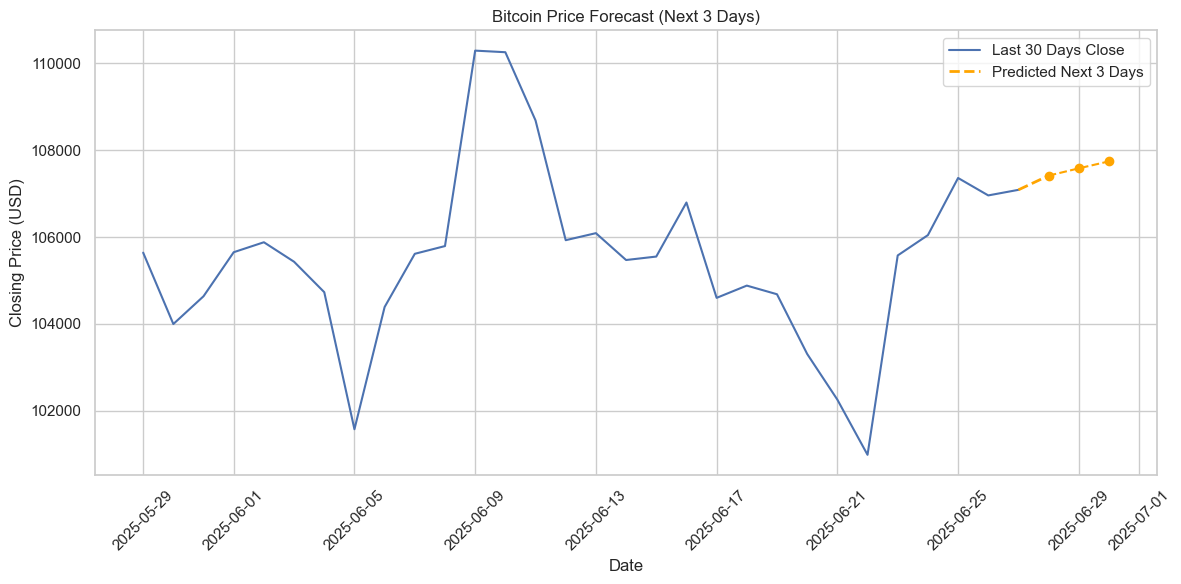

In [ ]:
#Final visual plot
plt.figure(figsize=(12, 6))

#Actual BTC closes
plt.plot(btc_data.index[-30:], btc_data["Close"].tail(30), label="Last 30 Days Close")

#Connect last actual to first predicted (no marker)
plt.plot(
    [btc_data.index[-1], forecast.index[0]],
    [btc_data["Close"].iloc[-1].item(), forecast["Predicted_Close"].iloc[0].item()],
    color='orange',
    linestyle='--',
    linewidth=2,
    label="Predicted Next 3 Days"
)

#Predicted points with markers
plt.plot(
    forecast.index,
    forecast["Predicted_Close"],
    marker='o',
    linestyle='--',
    color='orange'
)

#Format plot
plt.title("Bitcoin Price Forecast (Next 3 Days)")
plt.xlabel("Date")
plt.ylabel("Closing Price (USD)")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
